In [1]:
import tensorflow as tf

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dog_cat_photos/train",
    image_size=(224, 224),
    label_mode="binary",
    batch_size=32,
    shuffle=True
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dog_cat_photos/test",
    image_size=(224, 224),
    label_mode="binary",
    batch_size=32,
    shuffle=False
)

Found 300 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [2]:
list(train_dataset.as_numpy_iterator())[0]

2025-07-28 22:18:12.570818: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


(array([[[[233.       , 227.       , 215.       ],
          [233.       , 227.       , 215.       ],
          [233.       , 227.       , 215.       ],
          ...,
          [242.       , 237.       , 231.       ],
          [242.       , 237.       , 231.       ],
          [242.       , 237.       , 231.       ]],
 
         [[232.99777  , 226.99777  , 214.99777  ],
          [232.99777  , 226.99777  , 214.99777  ],
          [232.99777  , 226.99777  , 214.99777  ],
          ...,
          [242.       , 237.       , 231.       ],
          [242.       , 237.       , 231.       ],
          [242.       , 237.       , 231.       ]],
 
         [[232.66295  , 226.66295  , 214.66295  ],
          [232.66295  , 226.66295  , 214.66295  ],
          [232.66295  , 226.66295  , 214.66295  ],
          ...,
          [242.       , 237.       , 231.       ],
          [242.       , 237.       , 231.       ],
          [242.       , 237.       , 231.       ]],
 
         ...,
 
         [[2

In [3]:
class_names = train_dataset.class_names
class_names

['cat', 'dog']

2025-07-28 22:22:52.975239: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


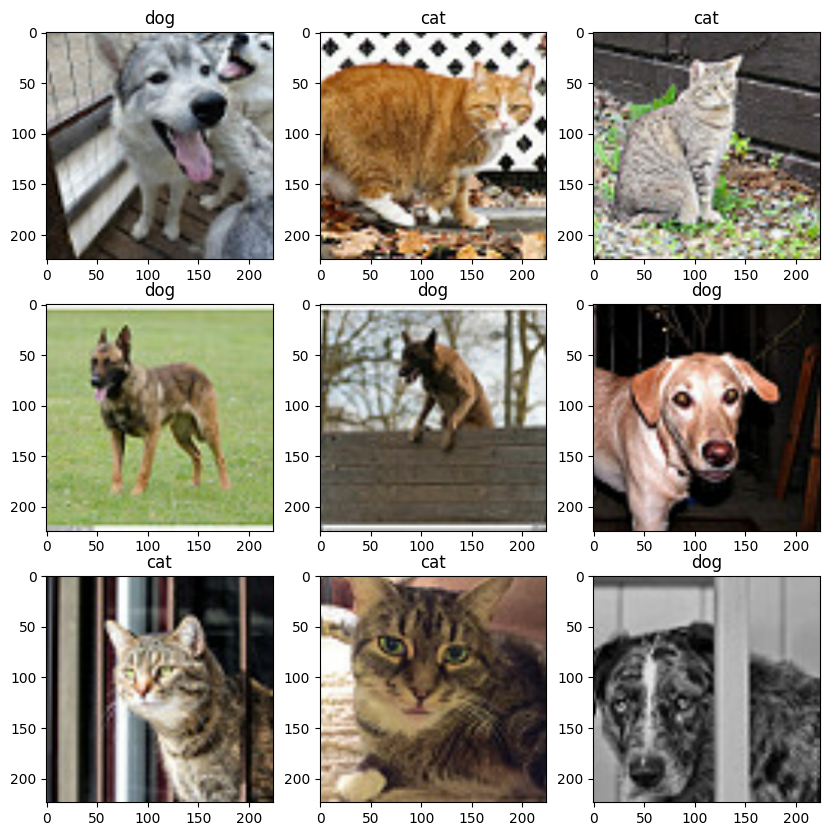

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().astype("uint8")[0]])

In [5]:
# 画像の水増しをする関数の定義
def flip_left_right(image, label):   # 左右反転
    image = tf.image.flip_left_right(image)
    return image, label

def flip_up_down(image, label):      # 上下反転
    image = tf.image.flip_up_down(image)
    return image, label

def rot90(image, label):             # 反時計回りに90度回転
    image = tf.image.rot90(image)
    return image, label

def rot180(image, label):            # 反時計回りに180度回転
    image = tf.image.rot90(image, k=2)
    return image, label

def rot270(image, label):            # 反時計回りに270度回転
    image = tf.image.rot90(image, k=3)
    return image, label

In [6]:
# 画像の水増し処理の実行
train_dataset_lr     = train_dataset.map(flip_left_right)
train_dataset_ud     = train_dataset.map(flip_up_down)
train_dataset_rot90  = train_dataset.map(rot90)
train_dataset_rot180 = train_dataset.map(rot180)
train_dataset_rot270 = train_dataset.map(rot270)

In [7]:
# 水増ししたデータを訓練データに追加する
train_dataset = train_dataset.concatenate(train_dataset_lr)
train_dataset = train_dataset.concatenate(train_dataset_ud)
train_dataset = train_dataset.concatenate(train_dataset_rot90)
train_dataset = train_dataset.concatenate(train_dataset_rot180)
train_dataset = train_dataset.concatenate(train_dataset_rot270)

In [ ]:
train_dataset = train_dataset.shuffle(buffer_size=1800)

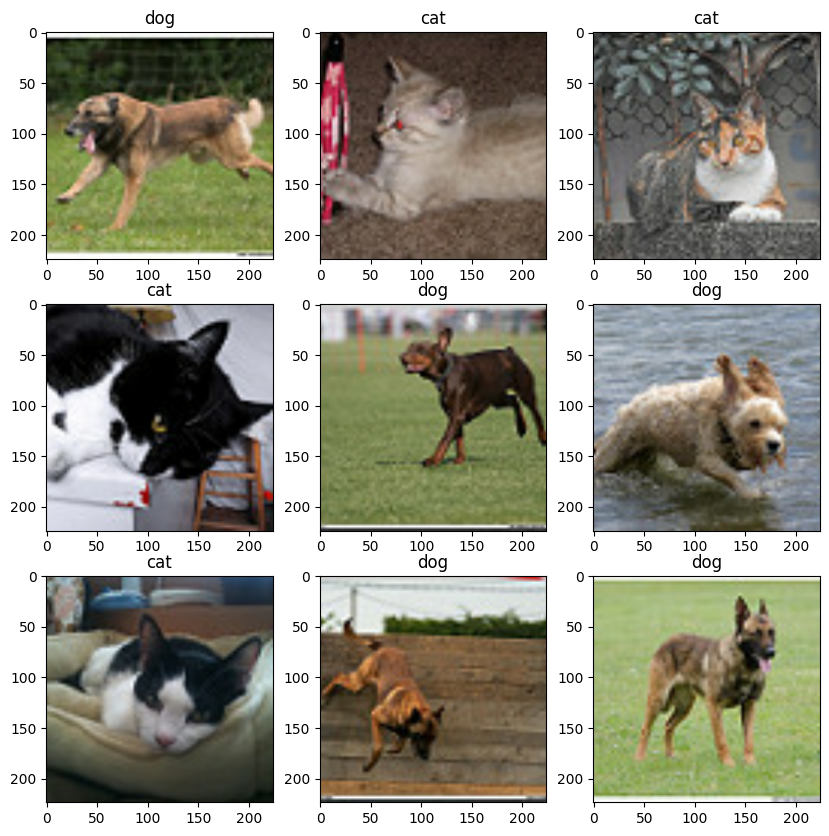

In [9]:
plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().astype("uint8")[0]])

In [10]:
input_layer = tf.keras.Input(shape=(224, 224, 3))   # 入力層
l_layer = tf.keras.applications.mobilenet_v2.preprocess_input(input_layer)   # 前処理（正規化）をする層

base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    input_tensor=l_layer,
    include_top=False,
    weights="imagenet",
    pooling='avg'
)
base_model.trainable = False

In [11]:
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

In [12]:
model = tf.keras.Sequential([
    base_model,
    output_layer
])

In [13]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=["accuracy"])

In [14]:
model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=20
)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - accuracy: 0.6961 - loss: 0.5548 - val_accuracy: 0.9800 - val_loss: 0.1205
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - accuracy: 0.9243 - loss: 0.2288 - val_accuracy: 0.9800 - val_loss: 0.0845
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - accuracy: 0.9478 - loss: 0.1719 - val_accuracy: 0.9700 - val_loss: 0.0748
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - accuracy: 0.9529 - loss: 0.1461 - val_accuracy: 0.9700 - val_loss: 0.0694
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.9697 - loss: 0.1112 - val_accuracy: 0.9700 - val_loss: 0.0670
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.9764 - loss: 0.1058 - val_accuracy: 0.9700 - val_loss: 0.0644
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.9743 - loss: 0.0964 - val_accuracy: 0.9700 - val_loss: 0.0636
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.9840 - loss: 0.0847 - val_accurac

In [15]:
pred_data = model.predict(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step


In [16]:
pred_data

array([[1.2241153e-04],
       [4.5591095e-04],
       [7.1376046e-05],
       [3.9110901e-03],
       [6.8851240e-04],
       [6.2634883e-04],
       [9.4502507e-04],
       [1.0836906e-03],
       [1.3750408e-05],
       [4.0868786e-04],
       [9.1377238e-05],
       [7.4639954e-03],
       [4.5936564e-03],
       [7.5374841e-04],
       [1.2867653e-04],
       [4.2859024e-06],
       [1.7039018e-04],
       [7.4893091e-04],
       [7.1549849e-03],
       [3.5668362e-03],
       [1.8676797e-02],
       [8.4234312e-02],
       [4.7542942e-03],
       [4.8987503e-04],
       [3.9190266e-01],
       [1.9796065e-03],
       [1.3894101e-03],
       [1.3230979e-03],
       [1.1392144e-02],
       [1.9939021e-04],
       [2.3082530e-03],
       [6.6821265e-01],
       [4.3446838e-04],
       [2.0883016e-03],
       [9.9918265e-03],
       [9.3430597e-01],
       [7.2219977e-03],
       [8.9415506e-04],
       [3.4872569e-02],
       [4.4453441e-04],
       [1.0577827e-03],
       [7.395882

In [17]:
model.evaluate(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9600 - loss: 0.0711


[0.06971147656440735, 0.9599999785423279]